#### A collection of canonical pre build Pattern to query BIOPAX datasets

##### imports

In [4]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [5]:
from biopax_explorer.pattern.rack import Rack
from biopax_explorer.pattern.pattern import PatternExecutor
import json

In [6]:
from biopax_explorer.pattern.view import writePatternGraphView
from IPython.display import Image

In [7]:
rk=Rack()


In [8]:
print("#----------------------")
print("patterns")
print("#----------------------")

for pname,p in rk.patterns.items():
    print("%s : %s"%(pname,p().description))
print("#----------------------")
print("sub patterns(building block)")
print("#----------------------")

for pname in rk.subpatterns.keys():
    print(pname)

#----------------------
patterns
#----------------------
controlsMetabolicCatalysis : 
        Pattern for a Protein controlling a reaction whose participant is a small molecule.
        The controller is in a Complex 
        
notBlackboxComplexInComplex : 
        Pattern to detect inconsistant complex (recursive complexes of complexes)
        
inComplexWith : 
        A Pattern that defines two proteins have states that are members of the same complex. Handles nested complexes and
        homologies. Also guarantees that relationship to the complex is through different direct
        complex members.
        
inSameComplex : 
        Pattern for two different EntityReference have member PhysicalEntity in the same Complex.
        Complex membership can be through multiple nesting and/or through homology relations.
        
controlsExpressionWithTemplateReac : 
        a Pattern defining the control of  a TemplateReation and the related products
        
usedToProduce : 
          A

##### Constants for database (change "localhost" for "db" if necessary)

In [9]:
datasetN = "netpath"
datasetP = "panther"
db = "http://db:3030" # with local triple store deployed with docker-compose
#db = "https://rdf-ds.genouest.org" # using an online default triple store



r = Rack()
peN = PatternExecutor(db,datasetN) # create a Pattern executor for a dataset
#peN.verbose() # display logs
peP = PatternExecutor(db,datasetP) # create a Pattern executor for a dataset
#peP.verbose() # display logs

# Function to print the URI of the 10 first lines of the results.

def first_lines_pk(res:list,size=10):
    if len(res)==0:
        print("-- no result in this dataset--")
    else:
        print("-- %s results in this dataset --" %(len(res)))
    for tab in res[:size]:
        for res in tab:
            print(res.pk, end=', ')
        print("")
def first_lines(res:list,size=10):
 
    if len(res)==0:
        print("-- no result in this dataset --")
    else:
        print("-- %s results in this dataset --" %(len(res)))
    for tab in res[:size]:
        for res in tab:
            m={"uri":res.pk,"class":res.cls}
            print(json.dumps(m))
        print("")        

### Pattern 1 : controlsMetabolicCatalysis

In [10]:
p = r.controlsMetabolicCatalysis()


In [11]:


res_P1 = peP.executePattern(p)
 
first_lines(res_P1)

print("corresponding generated SPARQL queries (multiple here):")
print("#------------------------")
for q in peP.querylist:
    print("###")
    print(q)
    print("###")
print("#------------------------")


-- 3275 results in this dataset --
{"uri": "http://pathwaycommons.org/pc12/#Catalysis_bf734355b89c655065b642b8754aa36c", "class": "Catalysis"}
{"uri": "http://pathwaycommons.org/pc12/#ComplexAssembly_efa6e8280aac983ec6be651e757cd78b", "class": "ComplexAssembly"}
{"uri": "http://pathwaycommons.org/pc12/#Protein_63b519b626488d0507c012caf5ba35b0", "class": "Protein"}
{"uri": "http://pathwaycommons.org/pc12/#SmallMolecule_a09b823a4d9db9b7d39e0a6d981fb801", "class": "SmallMolecule"}

{"uri": "http://pathwaycommons.org/pc12/#Catalysis_c50e1ff7775e9794c5069e26b936434c", "class": "Catalysis"}
{"uri": "http://pathwaycommons.org/pc12/#BiochemicalReaction_2b00e35fa97280d9debaccf3c7c47949", "class": "BiochemicalReaction"}
{"uri": "http://pathwaycommons.org/pc12/#Protein_8fa3b76da2bdd01480b77cb5d52a38e7", "class": "Protein"}
{"uri": "http://pathwaycommons.org/pc12/#SmallMolecule_f5df6749186c5e821347c22e30478d59", "class": "SmallMolecule"}

{"uri": "http://pathwaycommons.org/pc12/#Catalysis_01d50d0f

### Pattern 2 : inComplexWith

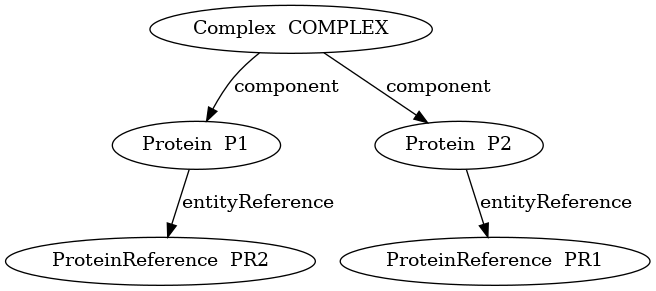

In [12]:
 

p = r.inComplexWith()

img="data/output/inComplexWith.svg"
writePatternGraphView(p,img,format="svg")

img="data/output/inComplexWith.png"
writePatternGraphView(p,img, format="png") # other format : svg
Image(img)




In [13]:

res_P2 = peN.executePattern(p)
print("first result; object oriented instance manipulation")

print("first 10 results (uris)")
first_lines_pk(res_P2)

first result; object oriented instance manipulation
first 10 results (uris)
-- 3260 results in this dataset --
http://pathwaycommons.org/pc12/#Complex_151ed4c4ece14ff69a6d51679cb7ead7, http://pathwaycommons.org/pc12/#Protein_866d2e8479f1c4c1f92d8e5ad2214783, http://pathwaycommons.org/pc12/#Protein_b8221ae4aa1927b358e88d6eb6621650, http://identifiers.org/uniprot/P16471, http://identifiers.org/uniprot/O60674, 
http://pathwaycommons.org/pc12/#Complex_e06d3622e685e82d46a2edd9ccffc090, http://pathwaycommons.org/pc12/#Protein_8a874f0ea831516e9c0728fdb76198bb, http://pathwaycommons.org/pc12/#Protein_e56e82e7ef21b5799328ee719d6d47f6, http://identifiers.org/uniprot/Q9NQC7, http://identifiers.org/uniprot/Q9Y4K3, 
http://pathwaycommons.org/pc12/#Complex_eb3e971c804489c19078182a7ac70459, http://pathwaycommons.org/pc12/#Protein_8a874f0ea831516e9c0728fdb76198bb, http://pathwaycommons.org/pc12/#Protein_06d601b603de842d87c35b35ad33865a, http://identifiers.org/uniprot/O43318, http://identifiers.org/uni

### Pattern 3 : inSameComplex

In [14]:
p = r.inSameComplex()

res_P3 = peN.executePattern(p)

first_lines_pk(res_P3)

-- 3260 results in this dataset --
http://pathwaycommons.org/pc12/#Complex_151ed4c4ece14ff69a6d51679cb7ead7, http://pathwaycommons.org/pc12/#Protein_866d2e8479f1c4c1f92d8e5ad2214783, http://pathwaycommons.org/pc12/#Protein_b8221ae4aa1927b358e88d6eb6621650, http://identifiers.org/uniprot/O60674, http://identifiers.org/uniprot/P16471, 
http://pathwaycommons.org/pc12/#Complex_e06d3622e685e82d46a2edd9ccffc090, http://pathwaycommons.org/pc12/#Protein_8a874f0ea831516e9c0728fdb76198bb, http://pathwaycommons.org/pc12/#Protein_e56e82e7ef21b5799328ee719d6d47f6, http://identifiers.org/uniprot/Q9Y4K3, http://identifiers.org/uniprot/Q9NQC7, 
http://pathwaycommons.org/pc12/#Complex_eb3e971c804489c19078182a7ac70459, http://pathwaycommons.org/pc12/#Protein_8a874f0ea831516e9c0728fdb76198bb, http://pathwaycommons.org/pc12/#Protein_06d601b603de842d87c35b35ad33865a, http://identifiers.org/uniprot/Q9Y4K3, http://identifiers.org/uniprot/O43318, 
http://pathwaycommons.org/pc12/#Complex_eb3e971c804489c1907818

### Pattern 4 : controlsExpressionWithTemplateReac

In [15]:
p = r.controlsExpressionWithTemplateReac()

res_P4 = peP.executePattern(p)

first_lines_pk(res_P4)

-- 186 results in this dataset --
http://pathwaycommons.org/pc12/#TemplateReactionRegulation_add65d7dcbc0fb64fc52416c02436599, http://pathwaycommons.org/pc12/#TemplateReaction_37ac8d251fe3fd2ea22d887ba5b8857f, http://pathwaycommons.org/pc12/#Protein_5d5c7c0d2e7914c18f27aaa341e2cdb7, http://pathwaycommons.org/pc12/#RnaRegion_f109fbc253f916f257db07b61d15d295, 
http://pathwaycommons.org/pc12/#TemplateReactionRegulation_1be59a46ad3d359b55fa6b1ab01c5ee5, http://pathwaycommons.org/pc12/#TemplateReaction_37ac8d251fe3fd2ea22d887ba5b8857f, http://pathwaycommons.org/pc12/#Protein_3b4e32b8b764ba16cb98757ec6c19eb7, http://pathwaycommons.org/pc12/#RnaRegion_f109fbc253f916f257db07b61d15d295, 
http://pathwaycommons.org/pc12/#TemplateReactionRegulation_06835df57c87a930dfa9f8a3feffc686, http://pathwaycommons.org/pc12/#TemplateReaction_37ac8d251fe3fd2ea22d887ba5b8857f, http://pathwaycommons.org/pc12/#Protein_8324c842a1e05e915f991efc894ea678, http://pathwaycommons.org/pc12/#RnaRegion_f109fbc253f916f257db

### Pattern 5 : usedToProduce

In [16]:
p = r.usedToProduce()

res_P5 = peP.executePattern(p)

first_lines_pk(res_P5)

-- 2187 results in this dataset --
http://pathwaycommons.org/pc12/#BiochemicalReaction_815ee23e669b10849643f993bdbdc3af, http://pathwaycommons.org/pc12/#SmallMolecule_066bc5ddd20dbef88d54e189b9f716bf, http://pathwaycommons.org/pc12/#SmallMolecule_3d85ded276e55e2e7ec06ee6bb2be135, http://pathwaycommons.org/pc12/#SmallMoleculeReference_5750bd948616539b8647edb46f9aa539, http://pathwaycommons.org/pc12/#SmallMoleculeReference_686ef261203d10c67957192ddd952738, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_2097515ad5b19f4e233ac6fa3d6b2f55, http://pathwaycommons.org/pc12/#SmallMolecule_b67e77bc899d7ee3f7bf4200f6e0508f, http://pathwaycommons.org/pc12/#SmallMolecule_048629e5e56fe4832bcf5abde167fdd1, http://pathwaycommons.org/pc12/#SmallMoleculeReference_90d32d835a981139866261bc79543575, http://pathwaycommons.org/pc12/#SmallMoleculeReference_65852063d330bbe7d28860361a8610dd, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_6b0855cf708ec67bf82d12a055656edd, http://pathwaycommons.org/pc1

### Pattern 6 : reactsWith

In [17]:
p = r.reactsWith()

res_P6 = peP.executePattern(p)

first_lines_pk(res_P6)

-- 998 results in this dataset --
http://pathwaycommons.org/pc12/#BiochemicalReaction_6b0855cf708ec67bf82d12a055656edd, http://pathwaycommons.org/pc12/#SmallMolecule_b67e77bc899d7ee3f7bf4200f6e0508f, http://pathwaycommons.org/pc12/#SmallMolecule_d7efcaa9d1c288e5b3713eff1052ca77, http://pathwaycommons.org/pc12/#SmallMoleculeReference_90d32d835a981139866261bc79543575, http://pathwaycommons.org/pc12/#SmallMoleculeReference_abaf546f7ef829143f9f8c11063d43ef, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_48bef198676d2676d363dedec8cc7d0b, http://pathwaycommons.org/pc12/#SmallMolecule_237a205a845e789bc5c8e5ca10b590e1, http://pathwaycommons.org/pc12/#SmallMolecule_b6a213c137b4e3c2c49ba78eed4dde9f, http://pathwaycommons.org/pc12/#SmallMoleculeReference_0634987c3518b8a291024af3a7901f8c, http://pathwaycommons.org/pc12/#SmallMoleculeReference_fa9256047ab86f2827b316defbc5512d, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_6f9ee54c9cbd61375919c3b4a4094e00, http://pathwaycommons.org/pc12

### Pattern 7 : controlsPhosphorylation

In [18]:
p = r.controlsPhosphorylation()

res_P7 = peP.executePattern(p)

first_lines_pk(res_P7)

-- 1072 results in this dataset --
http://pathwaycommons.org/pc12/#Catalysis_b0ad8734438b714c57af7cb0251ce9a5, http://pathwaycommons.org/pc12/#BiochemicalReaction_c2c31839b509e5b522ab2d830d170cfd, http://pathwaycommons.org/pc12/#Protein_fe52684ca9f539eaaad8d810077e2763, http://pathwaycommons.org/pc12/#Protein_c5339551528b55a0a1d463cdc6547d67, http://pathwaycommons.org/pc12/#Protein_18dd08a268a592a72d3a06674b4b3b00, http://identifiers.org/uniprot/Q15139, http://identifiers.org/uniprot/Q15139, http://pathwaycommons.org/pc12/#ModificationFeature_f1317f5ca6ac5be1281a7e8f81a3714d, http://pathwaycommons.org/pc12/#SequenceModificationVocabulary_9154163cbf19483e42047bb3e4b24f1a, 
http://pathwaycommons.org/pc12/#Catalysis_b0ad8734438b714c57af7cb0251ce9a5, http://pathwaycommons.org/pc12/#BiochemicalReaction_c2c31839b509e5b522ab2d830d170cfd, http://pathwaycommons.org/pc12/#Protein_fe52684ca9f539eaaad8d810077e2763, http://pathwaycommons.org/pc12/#Protein_c5339551528b55a0a1d463cdc6547d67, http://pa

### Pattern 8 : modifierConv

In [19]:
p = r.modifierConv()

res_P8 = peN.executePattern(p)

first_lines_pk(res_P8)

-- 4872 results in this dataset --
http://pathwaycommons.org/pc12/#BiochemicalReaction_b892991189fbca87ef55e70584793cc0, http://pathwaycommons.org/pc12/#Protein_4a8a145108f9fa59685c6190430fbeed, http://identifiers.org/uniprot/P35568, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_324cadcff5e64e13633623f039a406b5, http://pathwaycommons.org/pc12/#Protein_4a8a145108f9fa59685c6190430fbeed, http://identifiers.org/uniprot/P35568, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_7ee4de755f8857798377c821374adaf4, http://pathwaycommons.org/pc12/#Protein_4a8a145108f9fa59685c6190430fbeed, http://identifiers.org/uniprot/P35568, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_103591e64a73e96623a839af84bfc419, http://pathwaycommons.org/pc12/#Protein_4a8a145108f9fa59685c6190430fbeed, http://identifiers.org/uniprot/P35568, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_2cdb75192c38f64e39a051456facd163, http://pathwaycommons.org/pc12/#Protein_d6cca2315da9ec35b5c7ab5c22a87300, http:

### Pattern 9 : stateChange

In [20]:
p = r.stateChange()

res_P9 = peN.executePattern(p)

first_lines_pk(res_P9)

-- 2384 results in this dataset --
http://pathwaycommons.org/pc12/#BiochemicalReaction_62f7ae47833be6077a61c0ddde84c917, http://pathwaycommons.org/pc12/#Protein_97a295df2ce7640ba4b4cb9f7afd7b5a, http://pathwaycommons.org/pc12/#Protein_7a654be983aa80d020c8b6c3617abb59, http://identifiers.org/uniprot/P10911, http://identifiers.org/uniprot/P10911, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_6bea1a1ac392ba528c7e695e3b93a2db, http://pathwaycommons.org/pc12/#Protein_8d5fb5187319f27988b0da64aa78f27a, http://pathwaycommons.org/pc12/#Protein_15cba89b6f8236780573d3db8ef8e13b, http://identifiers.org/uniprot/P46108, http://identifiers.org/uniprot/P46108, 
http://pathwaycommons.org/pc12/#BiochemicalReaction_6271a6d580d3e399b631e2e625ee8ff0, http://pathwaycommons.org/pc12/#Protein_57aa30744f37edbc717cd99605280e70, http://pathwaycommons.org/pc12/#Protein_b424629aa340138e90806183e0d4e884, http://identifiers.org/uniprot/P28482, http://identifiers.org/uniprot/P28482, 
http://pathwaycommons.org/

### Pattern 10 : controlsStateChange

In [21]:
p = r.controlsStateChange()

res_P10 = peN.executePattern(p)

first_lines_pk(res_P10)

-- 676 results in this dataset --
http://pathwaycommons.org/pc12/#Catalysis_84b80f728dd3f89bea7345778bb4eb94, http://pathwaycommons.org/pc12/#BiochemicalReaction_b892991189fbca87ef55e70584793cc0, http://pathwaycommons.org/pc12/#Protein_91fee738b6774d6585fde871d14e25da, http://pathwaycommons.org/pc12/#Protein_4a8a145108f9fa59685c6190430fbeed, http://pathwaycommons.org/pc12/#Protein_79856ff790bab5a19b49069093957a14, http://identifiers.org/uniprot/P35568, http://identifiers.org/uniprot/P35568, http://identifiers.org/uniprot/P52333, 
http://pathwaycommons.org/pc12/#Catalysis_2bfcf2717ebcae1ac6cf016a18f378aa, http://pathwaycommons.org/pc12/#BiochemicalReaction_08ca73a5dd4bf0ce213249092a677cac, http://pathwaycommons.org/pc12/#Protein_0639838efa23abff14ceebf9b544fc43, http://pathwaycommons.org/pc12/#Protein_45a55c65b8a1e11d00324e8d63afaefa, http://pathwaycommons.org/pc12/#Protein_55c11ec747711fe7bd4b1b4677035292, http://identifiers.org/uniprot/P29353, http://identifiers.org/uniprot/P29353, ht

### Pattern 11 : molecularInteraction

In [22]:
p = r.molecularInteraction()

res_P11 = peN.executePattern(p)

first_lines_pk(res_P11)

-- 7522 results in this dataset --
http://pathwaycommons.org/pc12/#MolecularInteraction_80c95f96dad6f7b9542d8e910c4664c1, http://pathwaycommons.org/pc12/#Protein_8d5fb5187319f27988b0da64aa78f27a, http://pathwaycommons.org/pc12/#Protein_d0976de0c58cc6a122d08813459f3002, 
http://pathwaycommons.org/pc12/#MolecularInteraction_85fe7c3c360b17b6b0a9ddc18f4b04a5, http://pathwaycommons.org/pc12/#Protein_8d5fb5187319f27988b0da64aa78f27a, http://pathwaycommons.org/pc12/#Protein_76d01375b298d35fc317778e607a3f25, 
http://pathwaycommons.org/pc12/#MolecularInteraction_72be02573aebde4815d83be983430225, http://pathwaycommons.org/pc12/#Protein_8d5fb5187319f27988b0da64aa78f27a, http://pathwaycommons.org/pc12/#Protein_baede168dc071d910013b95d7ce60464, 
http://pathwaycommons.org/pc12/#MolecularInteraction_e036a4817c58f424dddd01fbb11a3874, http://pathwaycommons.org/pc12/#Protein_91fee738b6774d6585fde871d14e25da, http://pathwaycommons.org/pc12/#Protein_c7854957a663c0d5a92da62454dfc16f, 
http://pathwaycommons

### Pattern 12 : inSameActiveComplex

In [23]:
p = r.inSameActiveComplex()

res_P12 = peN.executePattern(p)

first_lines_pk(res_P12)

-- 2872 results in this dataset --
http://pathwaycommons.org/pc12/#MolecularInteraction_0cf2e610ce9807eb3632dd9fd1146475, http://pathwaycommons.org/pc12/#Complex_b4b7527f5a1beedd0e2c64b4388884ee, http://pathwaycommons.org/pc12/#Protein_5eed98296a729764f7c7d3a1a95b9aed, http://pathwaycommons.org/pc12/#Protein_ccfac61571656a21a570ac2516fc7dd1, 
http://pathwaycommons.org/pc12/#MolecularInteraction_0cf2e610ce9807eb3632dd9fd1146475, http://pathwaycommons.org/pc12/#Complex_b4b7527f5a1beedd0e2c64b4388884ee, http://pathwaycommons.org/pc12/#Protein_ccfac61571656a21a570ac2516fc7dd1, http://pathwaycommons.org/pc12/#Protein_5eed98296a729764f7c7d3a1a95b9aed, 
http://pathwaycommons.org/pc12/#MolecularInteraction_5b4f4d07922bfe9f5bffe5a3fc130dfb, http://pathwaycommons.org/pc12/#Complex_62dc9997327dec31a0984f15abe6efc6, http://pathwaycommons.org/pc12/#Protein_ca9c4c842d9c1691e6db3a3644433b70, http://pathwaycommons.org/pc12/#Protein_67b78f061b9963aeb7fe9e392787cec9, 
http://pathwaycommons.org/pc12/#Mol

### Pattern 13 : inSameComplexEffectingControl

In [24]:
# No results neither in Netpath nor in Panther.
p = r.inSameComplexEffectingControl()

res_P13 = peN.executePattern(p)

first_lines_pk(res_P13)

-- 360 results in this dataset --
http://pathwaycommons.org/pc12/#Catalysis_41f0211d35bbdcdcbdfb963ae3c17404, http://pathwaycommons.org/pc12/#Complex_3c63da5f7e581c470e8f2ca551558302, http://pathwaycommons.org/pc12/#Protein_6e5c3b1dd2b890f17b63dcd1c6dcd774, http://pathwaycommons.org/pc12/#Protein_6e9eb16e84975dc47103b49c68613944, http://identifiers.org/uniprot/Q92793, http://identifiers.org/uniprot/Q09472, 
http://pathwaycommons.org/pc12/#Catalysis_41f0211d35bbdcdcbdfb963ae3c17404, http://pathwaycommons.org/pc12/#Complex_3c63da5f7e581c470e8f2ca551558302, http://pathwaycommons.org/pc12/#Protein_6e9eb16e84975dc47103b49c68613944, http://pathwaycommons.org/pc12/#Protein_6e5c3b1dd2b890f17b63dcd1c6dcd774, http://identifiers.org/uniprot/Q09472, http://identifiers.org/uniprot/Q92793, 
http://pathwaycommons.org/pc12/#Catalysis_2164519717fbd8ac420b838fe1f8e3c7, http://pathwaycommons.org/pc12/#Complex_f70fb481f0301dddb01b750eb5320991, http://pathwaycommons.org/pc12/#Protein_f5eb6fd7a4dfa7a8cd2d3b

### Pattern 14 : bindsTo

In [25]:
p = r.bindsTo()

res_P14 = peN.executePattern(p)

first_lines_pk(res_P14)

-- 3260 results in this dataset --
http://pathwaycommons.org/pc12/#Complex_151ed4c4ece14ff69a6d51679cb7ead7, http://pathwaycommons.org/pc12/#Protein_866d2e8479f1c4c1f92d8e5ad2214783, http://pathwaycommons.org/pc12/#Protein_b8221ae4aa1927b358e88d6eb6621650, http://identifiers.org/uniprot/O60674, http://identifiers.org/uniprot/P16471, 
http://pathwaycommons.org/pc12/#Complex_e06d3622e685e82d46a2edd9ccffc090, http://pathwaycommons.org/pc12/#Protein_8a874f0ea831516e9c0728fdb76198bb, http://pathwaycommons.org/pc12/#Protein_e56e82e7ef21b5799328ee719d6d47f6, http://identifiers.org/uniprot/Q9Y4K3, http://identifiers.org/uniprot/Q9NQC7, 
http://pathwaycommons.org/pc12/#Complex_eb3e971c804489c19078182a7ac70459, http://pathwaycommons.org/pc12/#Protein_8a874f0ea831516e9c0728fdb76198bb, http://pathwaycommons.org/pc12/#Protein_06d601b603de842d87c35b35ad33865a, http://identifiers.org/uniprot/Q9Y4K3, http://identifiers.org/uniprot/O43318, 
http://pathwaycommons.org/pc12/#Complex_eb3e971c804489c1907818

### Pattern for complex validation : notBlackboxComplexInComplex

In [26]:
p = r.notBlackboxComplexInComplex()

res_P8 = peP.executePattern(p)

first_lines_pk(res_P8)
print('\n'.join(map(str,peP.trace))) # display processing log (usefull for Pattern design)
print("corresponding SPARQL query:")
print("#------------------------")
print(peP.querylist[0])
print("#------------------------")


-- 174 results in this dataset --
http://pathwaycommons.org/pc12/#Complex_579bb103ee0f0793438b03948e6e761f, http://pathwaycommons.org/pc12/#Complex_9701b7f04c04463e71ef2649927b4b19, http://pathwaycommons.org/pc12/#Complex_48c9d96b3ebb96af4af73dc161a6fb34, 
http://pathwaycommons.org/pc12/#Complex_579bb103ee0f0793438b03948e6e761f, http://pathwaycommons.org/pc12/#Complex_9701b7f04c04463e71ef2649927b4b19, http://pathwaycommons.org/pc12/#Complex_82de90a4d69084412cb281fa7aacc325, 
http://pathwaycommons.org/pc12/#Complex_9701b7f04c04463e71ef2649927b4b19, http://pathwaycommons.org/pc12/#Complex_48c9d96b3ebb96af4af73dc161a6fb34, http://pathwaycommons.org/pc12/#Protein_ae5422a9f331d287be33b875130243dd, 
http://pathwaycommons.org/pc12/#Complex_2c59ca198864fca3a6f6aa135fb9c0f7, http://pathwaycommons.org/pc12/#Complex_d85f4c436c475149211d8b755b6fc1d2, http://pathwaycommons.org/pc12/#Protein_ad0125246c6db14c23d33eb1d4c8c287, 
http://pathwaycommons.org/pc12/#Complex_15cf0ce0222559e1fc0ef3131703a607, 

### a Pattern  can be made of multiple sub patterns associated with Set Operator
see https://forgemia.inra.fr/pegase/biopax-explorer/-/blob/main/src/biopax_explorer/pattern/rack.py 
for more details


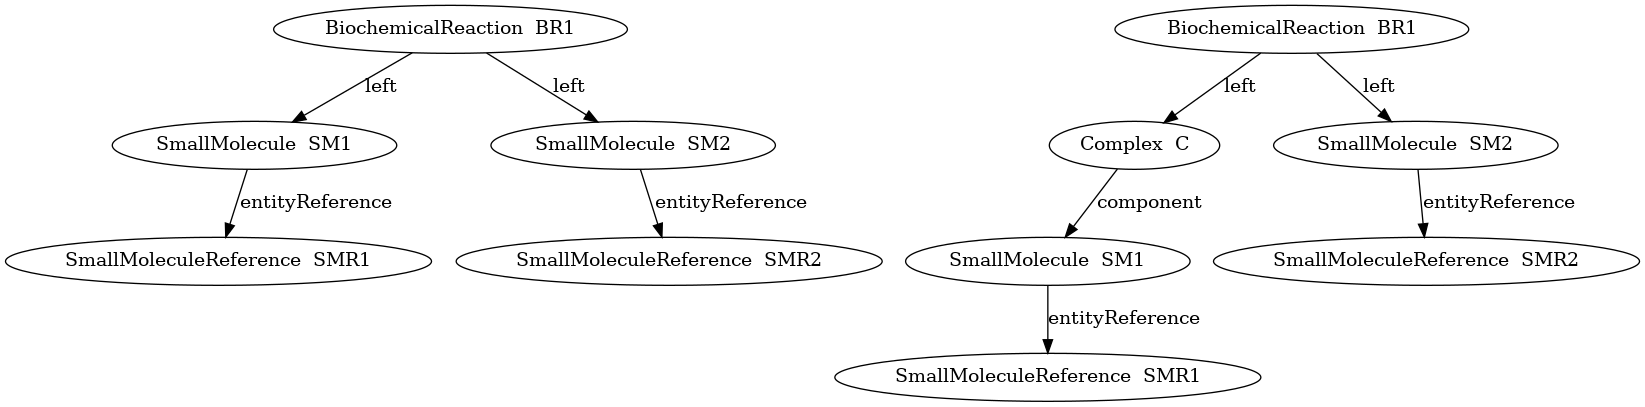

In [27]:


p = r.reactsWith()
img="data/output/reactsWith.png"
writePatternGraphView(p,img, format="png") # other format : svg
Image(img)
